In [2]:
from qiskit import IBMQ, QuantumCircuit
import qiskit
import numpy as np

In [4]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-20 04:12:36,492: Credentials are already in use. The existing account in the session will be replaced.


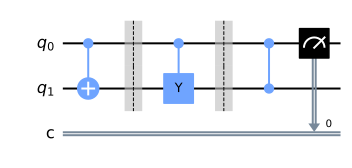

In [8]:
"""すべての2量子以上のビットゲートはCXゲートと1量子ビットの基本ゲートの組み合わせに分解可能
まず適当に量子回路を作る
"""
qc = QuantumCircuit(2, 1)

qc.cx(0, 1)
qc.barrier()
qc.cy(0, 1)
qc.barrier()
qc.cz(0, 1)
qc.measure(0, 0)

qc.draw("mpl")

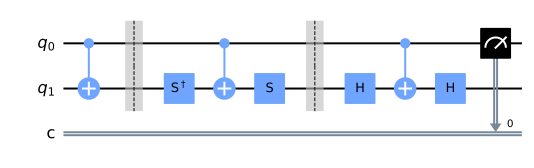

In [9]:
"""これを分解する
直接ネイティブゲートに分解することも可能だが、ここでは段階的に分解していく。

2量子ビットゲートを、まずCXゲートと1量子ビットゲート（ネイティブゲートとは限らない）に分解していく

次に1量子ビットゲートもネイティブゲートに置き換えることで、全体をネイティブゲートに置き換える。

このような分解にはdecompose()を使う
"""
qc_basis2 = qc.decompose()
qc_basis2.draw("mpl")

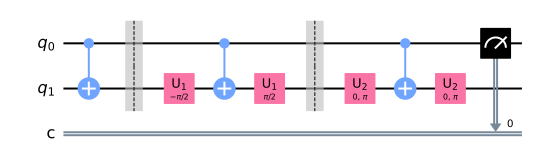

In [10]:
"""さらにdecompose
すると、1量子ビットゲートをU1, U2, U3に分解される。

decompose()は1実行ごとに1段階だけ分解された量子回路を返す
"""
qc_basis1 = qc_basis2.decompose()
qc_basis1.draw("mpl")

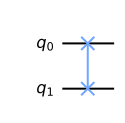

In [11]:
"""SWAPげーとの分解
"""
qc = QuantumCircuit(2)

qc.swap(0, 1)
qc.draw("mpl")

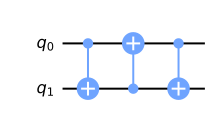

In [12]:
"""SWAPをdecompose
3つのCXでできていることがわかる
"""
qc_basis = qc.decompose()
qc_basis.draw("mpl")

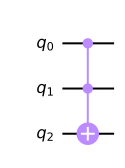

In [13]:
"""トフォリゲート（CCX）の分解
"""
qc = QuantumCircuit(3)

qc.ccx(0,1,2)
qc.draw("mpl")

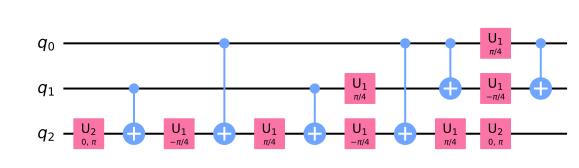

In [14]:
"""トフォリゲートをdecompose

ある量子ゲートをネイティブゲートのみからなる量子回路に変換する際、ゲート数がどの程度増えるかは重要。

CNOTゲートエラー率を1%とした場合、トフォリゲートを1度実行すると、CNOTゲートが6回実行される。
それだけで成功率は、単純な見積もりで0.99^6 = 94% まで下がる。

よってエラーの影響が大きくなるような深い量子回路を組む際には、トランスパイラによる変換後の素子数でエラー率を考える必要がある。
"""
qc_basis = qc.decompose().decompose()
qc_basis.draw("mpl")